<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Naive_Bayes_Spam_Filter_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [0]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

sms_raw['message']=sms_raw.message.str.lower()

In [0]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent','private','win','reward','quiz','claim']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [0]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

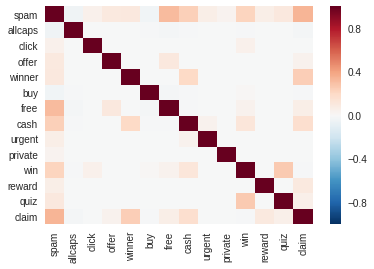

In [0]:
sns.heatmap(sms_raw.corr())

# At this point if there were any words that showed high correlation to one another
# They could possibly be combined with PCA

In [0]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

data

In [0]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 499


In [0]:
#sms_raw
sms_raw[sms_raw['spam']==True]

In [0]:
#let's come up with some better feature words for our classifier
#First by doing a simple frequency count of the words that are in spam messages
# Second do a frequency count of words that are ham

#then we'll over lap the distributions and see what key words create too many false positives

spam = sms_raw[sms_raw['spam']==True]['message'].apply(lambda x:x.split())

ham  = sms_raw[sms_raw['spam']!=True]['message'].apply(lambda x:x.split())

ham.head()

0    [go, until, jurong, point,, crazy.., available...
1                 [ok, lar..., joking, wif, u, oni...]
3    [u, dun, say, so, early, hor..., u, c, already...
4    [nah, i, don't, think, he, goes, to, usf,, he,...
6    [even, my, brother, is, not, like, to, speak, ...
Name: message, dtype: object

In [0]:
spam=pd.DataFrame(spam)


spam = spam.apply(lambda x: pd.Series(x['message']),axis=1).stack().reset_index(level=1, drop=True).reset_index()
spam.columns=['Index','Words']
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17862 entries, 0 to 17861
Data columns (total 2 columns):
Index    17862 non-null int64
Words    17862 non-null object
dtypes: int64(1), object(1)
memory usage: 279.2+ KB


In [0]:

spam['Words'].value_counts()

#'claim' is high on the list of keywords not used in our feature list.


In [0]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [0]:
target

In [56]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

In [0]:
# Implement your own cross validation with your spam model.

#define a function that takes in 4 variables
# model type
# data set
# answer key
# number of  "folds"

#Returns
#an array of accuracy equal in length to the number of folds

#dir(sklearn.naive_bayes)

def cross_val(model, data, folds):
  import sklearn.naive_bayes
  accuracy = []
  
  sample_size = round((len(data)/folds))
 
  test_fold=data
  
  while len(test_fold) > sample_size :
  #create sample to model
    test_sample = test_fold.sample(sample_size)
  #drop the sample from the set so it can't be resampled
    test_fold=test_fold.drop(test_sample.index)
    
    test_data=test_sample[keywords + ['allcaps']]
    test_target=test_sample['spam']
  
    score = model.fit(test_data,test_target).score(test_data,test_target)
    accuracy.append(score)
  return accuracy
  #make n samples of the data variable
  ## Where n = folds
  #run each fold through the given model
  #aggregate results and return an array
  
  

In [125]:

cross_val(bnb,sms_raw, folds=10)

[0.9066427289048474,
 0.8689407540394973,
 0.9102333931777379,
 0.8797127468581688,
 0.9048473967684022,
 0.8761220825852782,
 0.9066427289048474,
 0.8850987432675045,
 0.9012567324955116,
 0.8868940754039497]

In [123]:
def cross_val(model, data, folds):
  import sklearn.naive_bayes
  accuracy = []
  sample_size = round((len(data)/folds))
  test_fold=data
  test_sample = test_fold.sample(sample_size)
  
  test_fold=test_fold.drop(test_sample.index)
  
  test_data=test_sample[keywords + ['allcaps']]
  test_target=test_sample['spam']
  
  score = model.fit(test_data,test_target).score(test_data,test_target)
  accuracy.append(score)
  return accuracy 
  
  #return model.fit(test_data,test_target).score(test_data,test_target)
  #return len(test_sample), len(test_fold) , len(data)
  #return test_data.head(), test_target.head()

cross_val(bnb,sms_raw, folds=10)

[0.8886894075403949]

In [79]:

test_fold=sms_raw
test_sample = test_fold.sample(round((len(test)/folds)))
test_fold=test_fold.drop(test_sample.index)
test_data=test_sample[keywords + ['allcaps']]
test_target=test_sample['spam']
  
score = bnb.fit(test_data,test_target).score(test_data,test_target)



0.8

In [52]:
folds = 4

test = pd.Series(np.arange(0,120,1))
test_fold=test
while len(test_fold) > round((len(test)/folds)):
  test_sample = test_fold.sample(round((len(test)/folds)))
  test_fold=test_fold.drop(test_sample.index)
  print((len(test)/folds)/100)
  print(len(test_sample))
  
  print(len(test_sample))

0.3
30
30
0.3
30
30
0.3
30
30


In [0]:
data

In [53]:
print (len(data))

5572
